The following configurations allow TPOT2 to learn a symbolic classification or regression model.


Leafs: Leaves can either select individual columns or output 1's or 0's.

Inner nodes: arithmetic operators

Root: logistic regression

Symbolic Classification

Generation:   0%|          | 0/20 [00:00<?, ?it/s]/home/ribeirop/common/Projects/TPOT_Dev/tpot2/tpot2/population.py:204: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['INVALID', 0.5309743954480797, 0.5565078236130867, 'INVALID', 0.5326458036984352, 'INVALID', 0.5241109530583214, 'INVALID', 0.471194879089616, 'INVALID']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.evaluated_individuals.loc[key,column_names] = data
/home/ribeirop/common/Projects/TPOT_Dev/tpot2/tpot2/population.py:204: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['INVALID', 2.0, 2.0, 'INVALID', 2.0, 'INVALID', 2.0, 'INVALID', 2.0, 'INVALID']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.evaluated_individuals.loc[key,column_names] = data
Generation:   5%|▌

0.5093856108655263


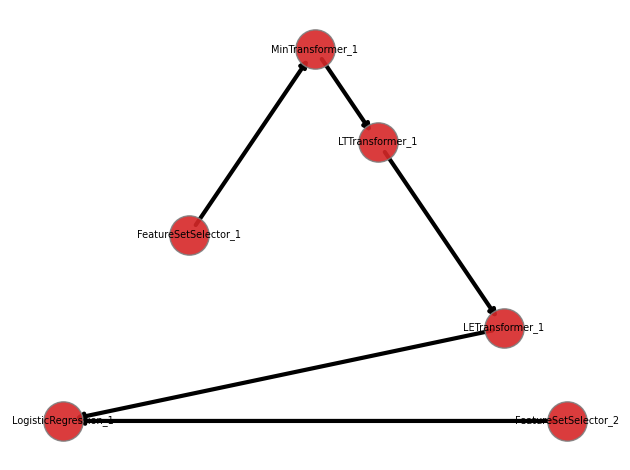

In [7]:
import tpot2
import sklearn.datasets
from sklearn.linear_model import LogisticRegression
import numpy as np

X, y = sklearn.datasets.make_classification(n_samples=1000, n_features=100, n_informative=6, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)

n_features = X_train.shape[1]

graph_search_space = tpot2.search_spaces.pipelines.GraphPipeline(
    root_search_space= tpot2.config.get_search_space("LogisticRegression"),
    leaf_search_space = tpot2.search_spaces.nodes.FSSNode(subsets=n_features), 
    inner_search_space = tpot2.config.get_search_space(["arithmatic"]),
    max_size = 10,
)

est = tpot2.TPOTEstimator(population_size=10,generations=20, 
                            scorers=['roc_auc_ovr'],
                            scorers_weights=[1],
                            other_objective_functions=[tpot2.objectives.number_of_nodes_objective],
                            other_objective_functions_weights=[-1],
                            n_jobs=32,
                            classification=True,
                            search_space = graph_search_space ,
                            verbose=1,
                            )

scorer = sklearn.metrics.get_scorer('roc_auc_ovo')

est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))
est.fitted_pipeline_.plot()

In [8]:
# print all hyperparameters
for n in est.fitted_pipeline_.graph.nodes:
    print(n, " : ", est.fitted_pipeline_.graph.nodes[n]['instance'])

LogisticRegression_1  :  LogisticRegression(C=0.28751652817028706, class_weight='balanced',
                   max_iter=1000, n_jobs=1, solver='liblinear')
FeatureSetSelector_1  :  FeatureSetSelector(name='93', sel_subset=[93])
FeatureSetSelector_2  :  FeatureSetSelector(name='25', sel_subset=[25])
LETransformer_1  :  LETransformer()
LTTransformer_1  :  LTTransformer()
MinTransformer_1  :  MinTransformer()


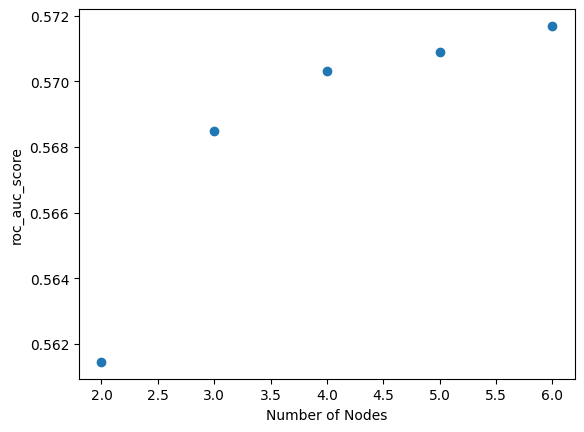

In [9]:
pareto_front = est.evaluated_individuals[est.evaluated_individuals['Pareto_Front'] == 1]

#plot the pareto front of number_of_leaves_objective vs roc_auc_score
import matplotlib.pyplot as plt
plt.scatter(pareto_front['number_of_nodes_objective'], pareto_front['roc_auc_score'])
plt.xlabel('Number of Nodes')
plt.ylabel('roc_auc_score')
plt.show()

Symbolic Regression

/home/ribeirop/miniconda3/envs/tpot2env/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37681 instead
  warnings.warn(
/home/ribeirop/common/Projects/TPOT_Dev/tpot2/tpot2/population.py:204: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.evaluated_individuals.loc[key,column_names] = data
/home/ribeirop/common/Projects/TPOT_Dev/tpot2/tpot2/population.py:204: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID', 'INVALID'

-6120.015400135764


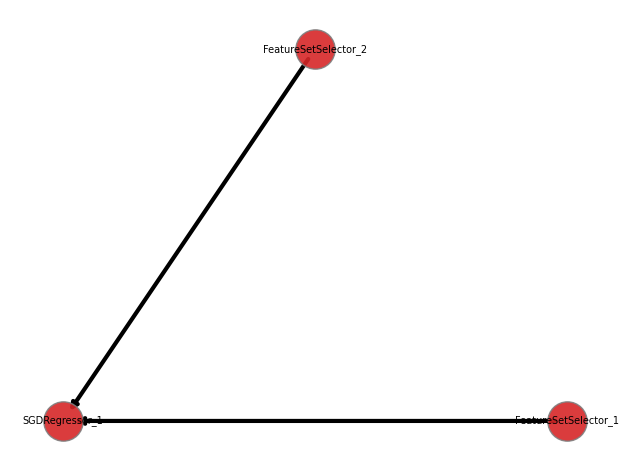

In [12]:
import tpot2
import sklearn.datasets

scorer = sklearn.metrics.get_scorer('neg_mean_squared_error')
X, y = sklearn.datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75, test_size=0.25)

graph_search_space = tpot2.search_spaces.pipelines.GraphPipeline(
    root_search_space= tpot2.config.get_search_space("SGDRegressor"),
    leaf_search_space = tpot2.search_spaces.nodes.FSSNode(subsets=n_features), 
    inner_search_space = tpot2.config.get_search_space(["arithmatic"]),
    max_size = 10,
)

est = tpot2.TPOTEstimator(population_size=10,generations=20, 
                            scorers=['neg_mean_squared_error'],
                            scorers_weights=[1],
                            other_objective_functions=[tpot2.objectives.number_of_nodes_objective],
                            other_objective_functions_weights=[-1],
                            n_jobs=32,
                            classification=False,
                            search_space = graph_search_space ,
                            verbose=1,
                            )



est.fit(X_train, y_train)
print(scorer(est, X_test, y_test))
est.fitted_pipeline_.plot()

In [13]:
# print all hyperparameters
for n in est.fitted_pipeline_.graph.nodes:
    print(n, " : ", est.fitted_pipeline_.graph.nodes[n]['instance'])

SGDRegressor_1  :  SGDRegressor()
FeatureSetSelector_1  :  FeatureSetSelector(name='7', sel_subset=[7])
FeatureSetSelector_2  :  FeatureSetSelector(name='7', sel_subset=[7])


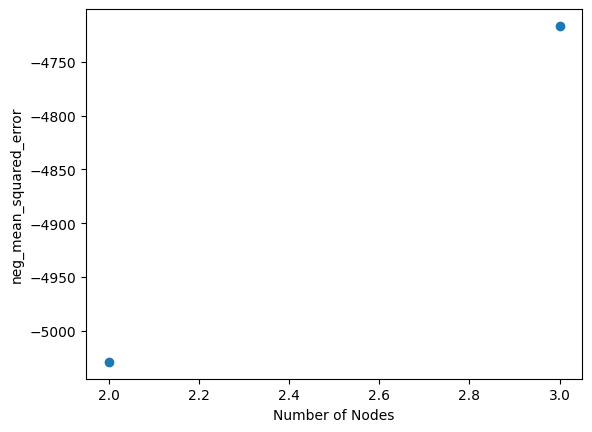

In [14]:
pareto_front = est.evaluated_individuals[est.evaluated_individuals['Pareto_Front'] == 1]

#plot the pareto front of number_of_leaves_objective vs roc_auc_score
import matplotlib.pyplot as plt
plt.scatter(pareto_front['number_of_nodes_objective'], pareto_front['mean_squared_error'])
plt.xlabel('Number of Nodes')
plt.ylabel('neg_mean_squared_error')
plt.show()